In [1]:
import numpy as np
import data_in_out as IO
import velocities as vl
import visualization as vis
import matplotlib.pyplot as plt
import pitchcontrol as pc
import ept
import matplotlib.animation as animation
import os
import pandas as pd
import json
import pathlib
import warnings
from mplsoccer import Pitch
from scipy.stats import binned_statistic_2d
pd.set_option('display.float_format', '{:.5f}'.format)
FC_TWENTE_FOLDER = os.path.join(os.getcwd(), "FC_TWENTE_FOLDER")
print(FC_TWENTE_FOLDER)

/home/jovyan/FC_Twente/FC_TWENTE_FOLDER


In [2]:
events1 = IO.load_fc_twente_data(game_id=1, mode="load-event")
events2 = IO.load_fc_twente_data(game_id=2, mode="load-event")
events3 = IO.load_fc_twente_data(game_id=3, mode="load-event")
events4 = IO.load_fc_twente_data(game_id=4, mode="load-event")
events5 = IO.load_fc_twente_data(game_id=5, mode="load-event")
events6 = IO.load_fc_twente_data(game_id=6, mode="load-event")
events = events1.append([events2, events3, events4, events5, events6])
# events = events4
events.reset_index(drop=True, inplace=True)


Loading Game 1 data...
Loading event data of Game 1...
Loading Game 2 data...
Loading event data of Game 2...
Loading Game 3 data...
Loading event data of Game 3...
Loading Game 4 data...
Loading event data of Game 4...
Loading Game 5 data...
Loading event data of Game 5...
Loading Game 6 data...
Loading event data of Game 6...


/tmp/ipykernel_2445/1686257227.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  events = events1.append([events2, events3, events4, events5, events6])


***Visualize all goal action of match 3***


In [3]:
events3 = IO.to_metric_coordinates(events3)

(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

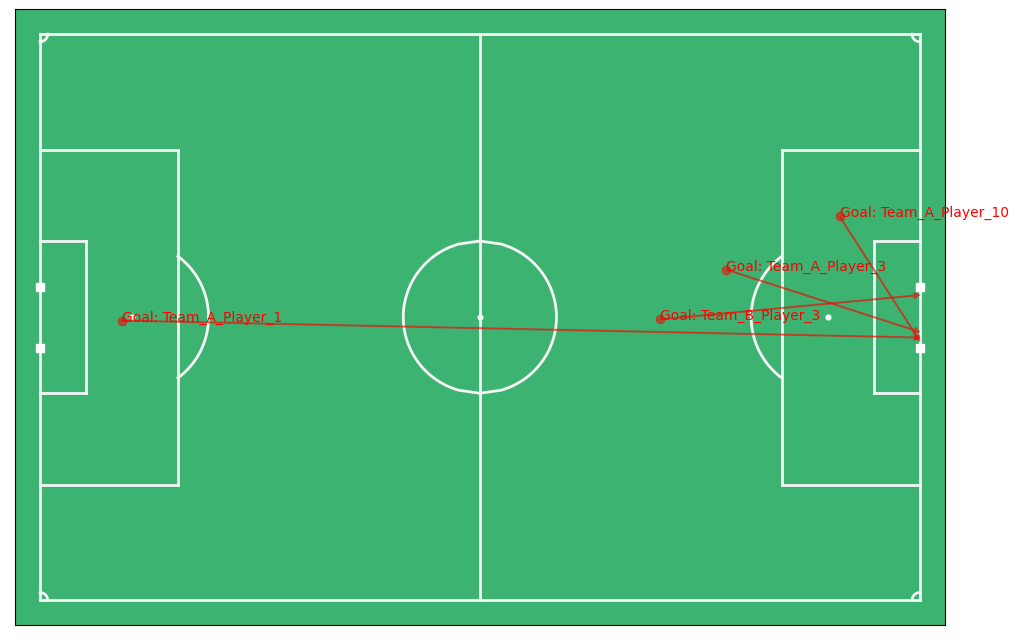

In [4]:
vis.plot_events(events3.loc[(events3["type_name"] == "Goal")], annotate=True)

***Filter all moving ball actions and plot heat map***


In [5]:
move_ball = events.loc[(events["type_name"] == "Pass") | (events["type_name"] == "Take on")]

move_df = move_ball[['start_x', 'start_y', 'end_x', 'end_y']].rename({'start_x': 'x', 'start_y':'y'}, axis = 1)
move_df['eventId'] = move_df.index

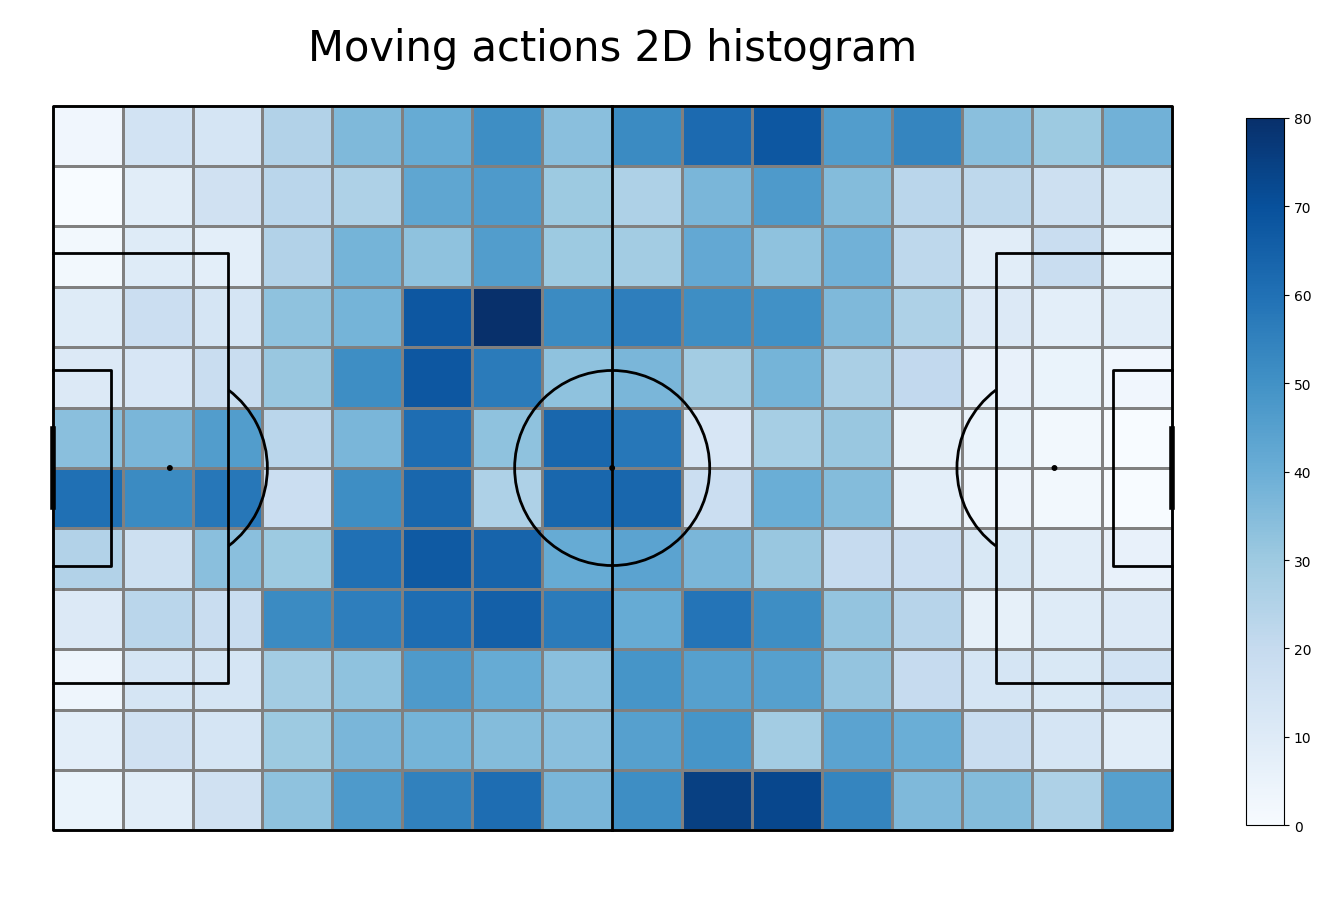

In [6]:
pitch = Pitch(line_color='black',pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
move = pitch.bin_statistic(move_df.x, move_df.y, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Moving actions 2D histogram', fontsize = 30)
plt.show()
#get the array
move_count = move["statistic"]

***Filter all shot actions and plot heat map***


In [7]:
shot_ball = events.loc[(events["type_name"] == "Attempt saved") | (events["type_name"] == "Goal") | (events["type_name"] == "Miss")]
shot_df = shot_ball[['start_x', 'start_y',]].rename({'start_x': 'x', 'start_y':'y'}, axis = 1)
shot_df['eventId'] = shot_df.index

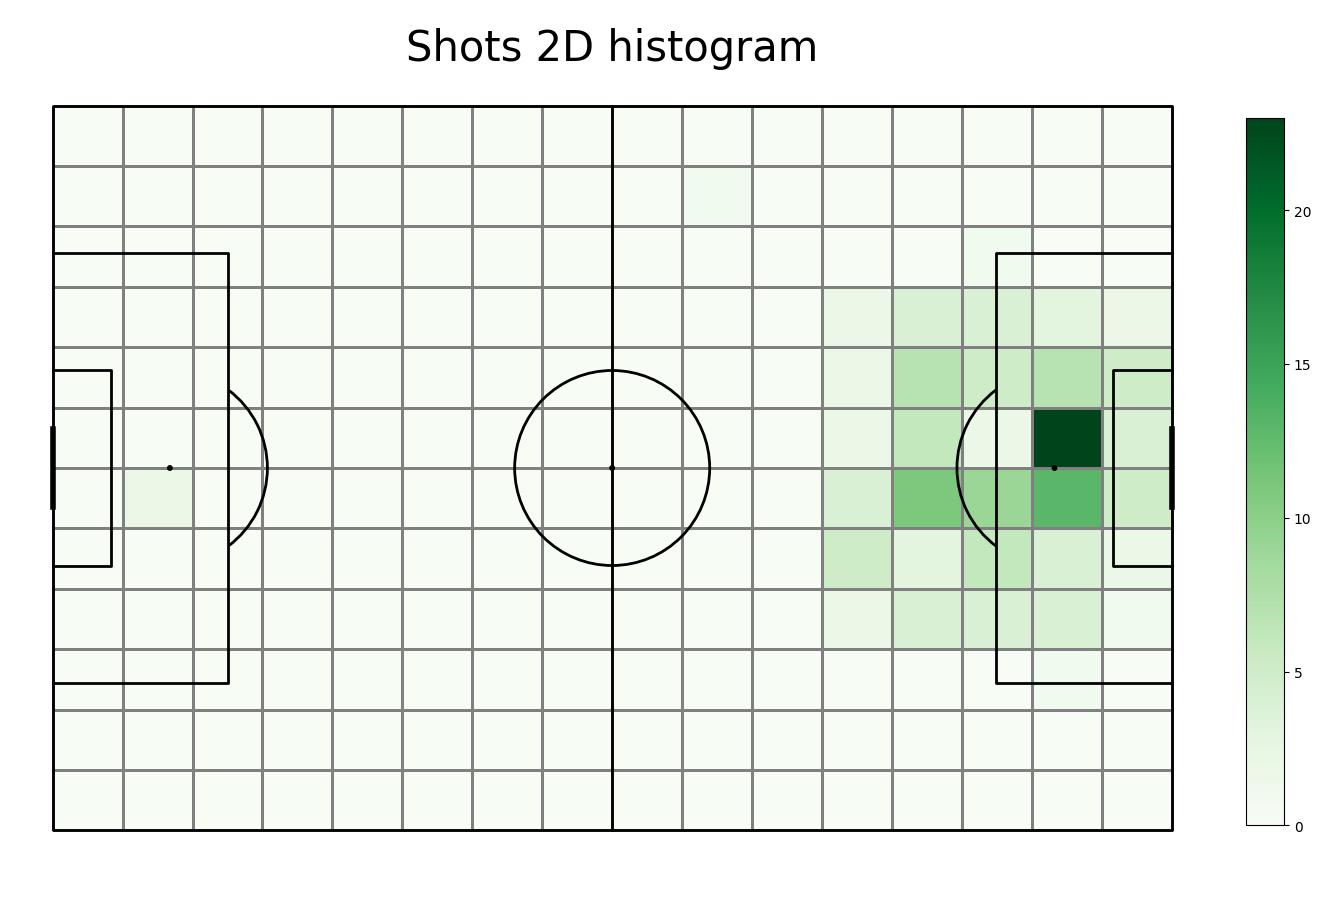

In [8]:
#create 2D histogram of these
shot = pitch.bin_statistic(shot_df.x, shot_df.y, statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shots 2D histogram', fontsize = 30)
plt.show()

shot_count = shot["statistic"]

***Filter all goal actions and plot heat map***


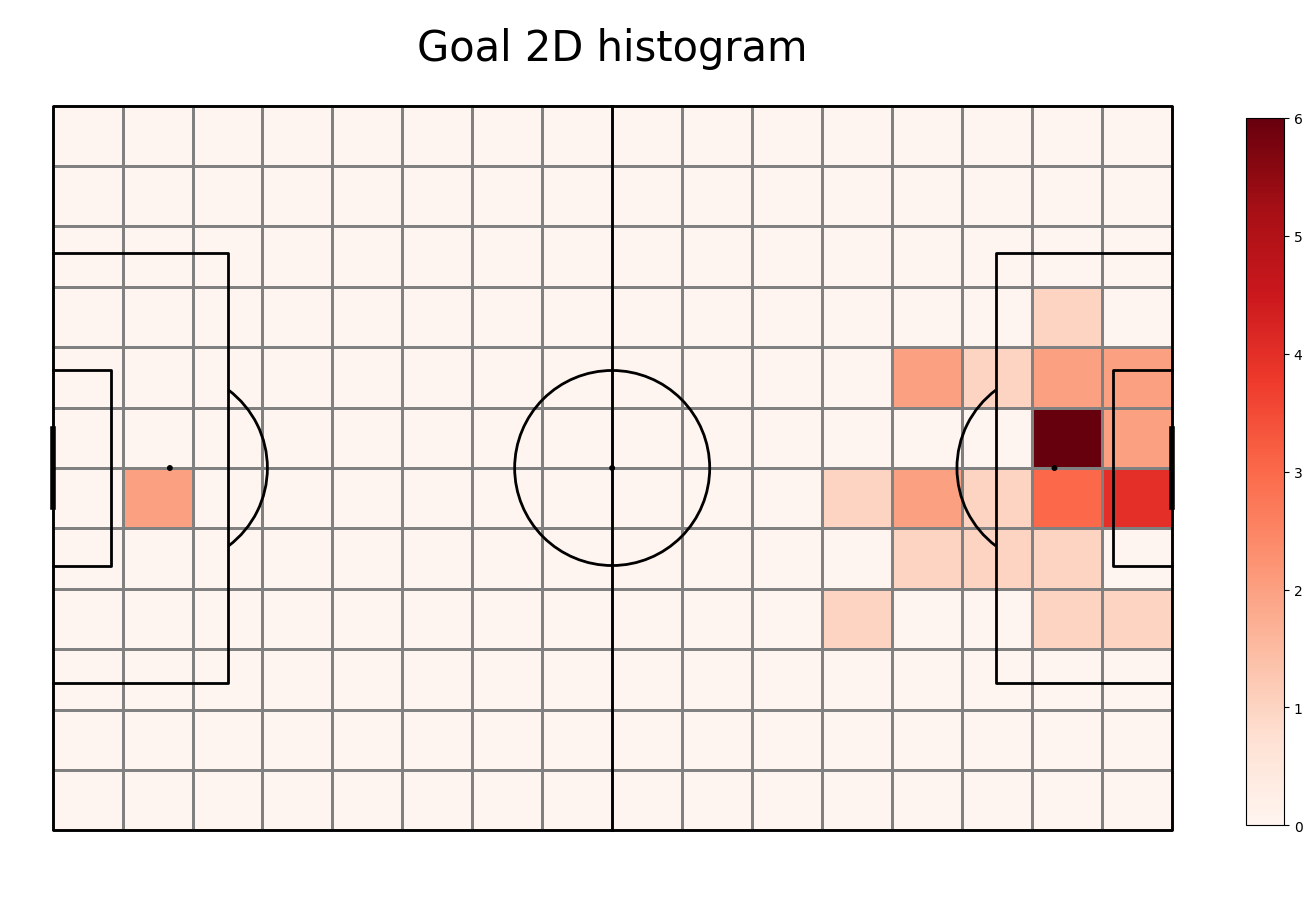

In [9]:
goal_ball = events.loc[(events["type_name"] == "Goal")]
goal_df = goal_ball[['start_x', 'start_y']].rename({'start_x': 'x', 'start_y':'y'}, axis = 1)
goal_df['eventId'] = goal_df.index

goal = pitch.bin_statistic(goal_df.x, goal_df.y, statistic='count', bins=(16, 12), normalize=False)
goal_count = goal["statistic"]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal 2D histogram', fontsize = 30)
plt.show()

***Move probability***

/tmp/ipykernel_2445/3349866522.py:1: RuntimeWarning: invalid value encountered in divide
  move_probability = move_count/(move_count+shot_count)


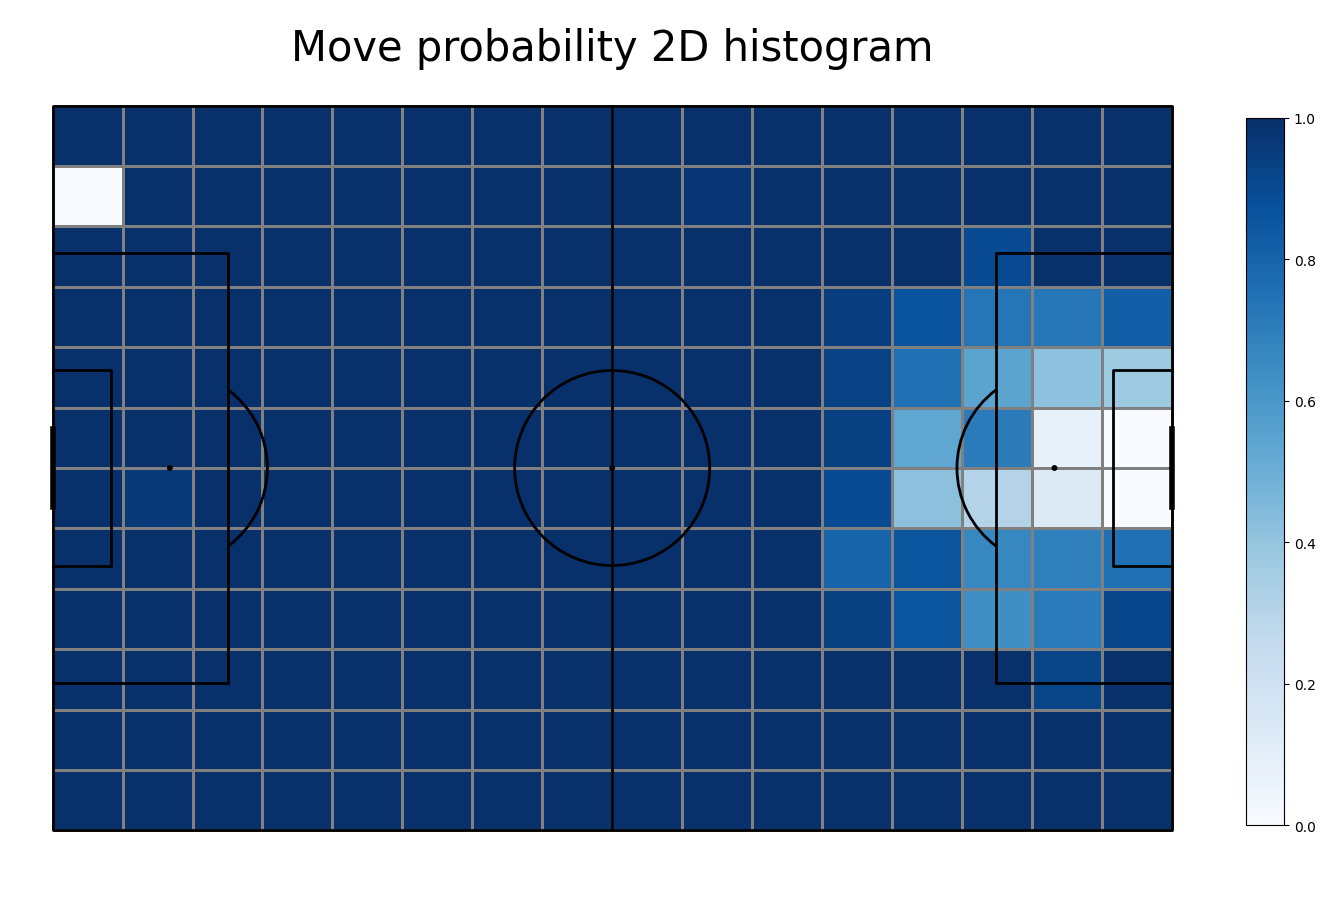

In [10]:
move_probability = move_count/(move_count+shot_count)
move_probability[np.isnan(move_probability)] = 0
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
move["statistic"] = move_probability
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Move probability 2D histogram', fontsize = 30)
plt.show()

***Shot probability***

/tmp/ipykernel_2445/2418445962.py:1: RuntimeWarning: invalid value encountered in divide
  shot_probability = shot_count/(move_count+shot_count)


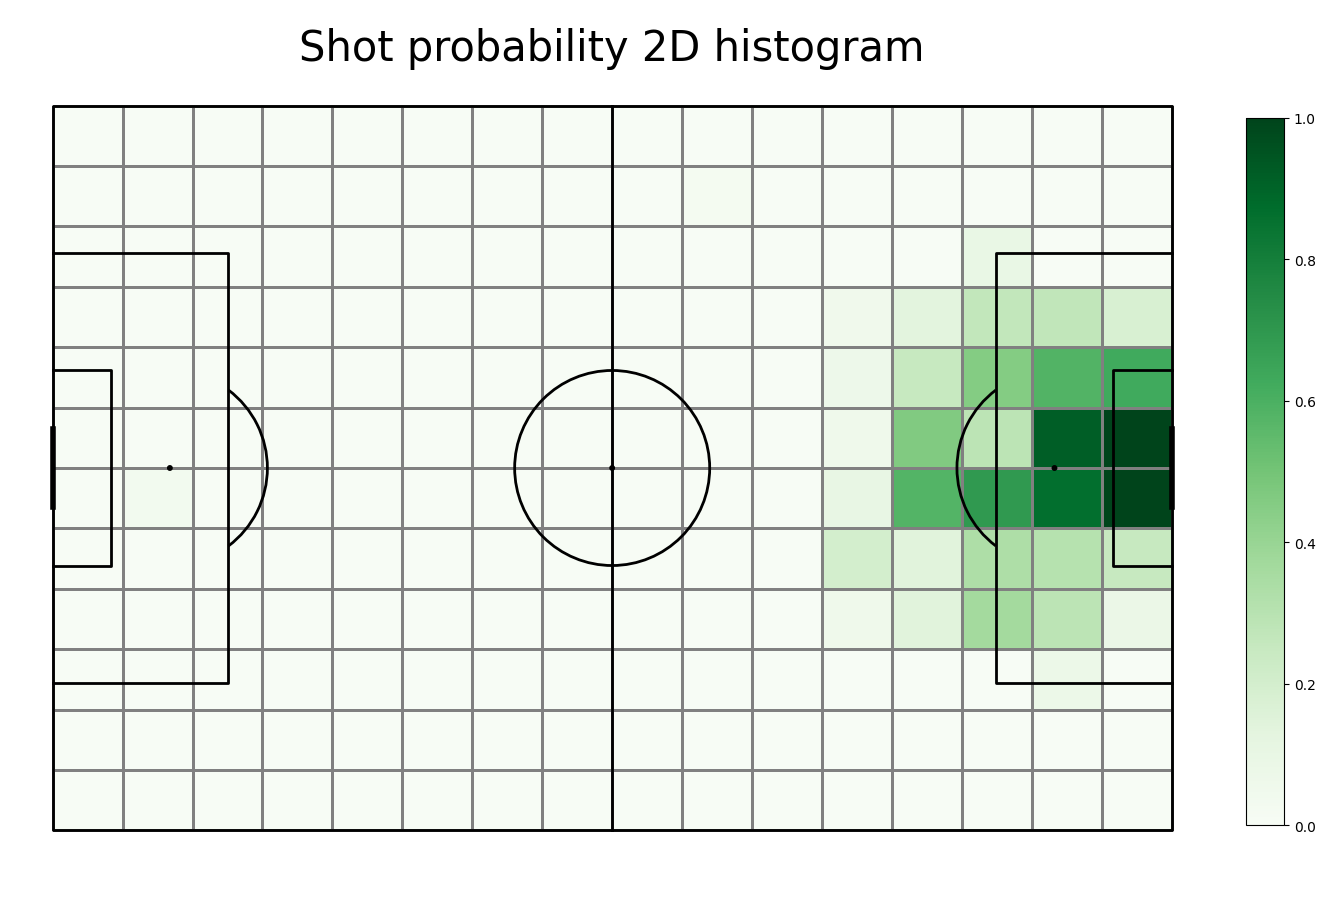

In [11]:
shot_probability = shot_count/(move_count+shot_count)
shot_probability[np.isnan(shot_probability)] = 0
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
shot["statistic"] = shot_probability
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot probability 2D histogram', fontsize = 30)
plt.show()

***Goal probability***

/tmp/ipykernel_2445/1173137835.py:1: RuntimeWarning: invalid value encountered in divide
  goal_probability = goal_count/shot_count


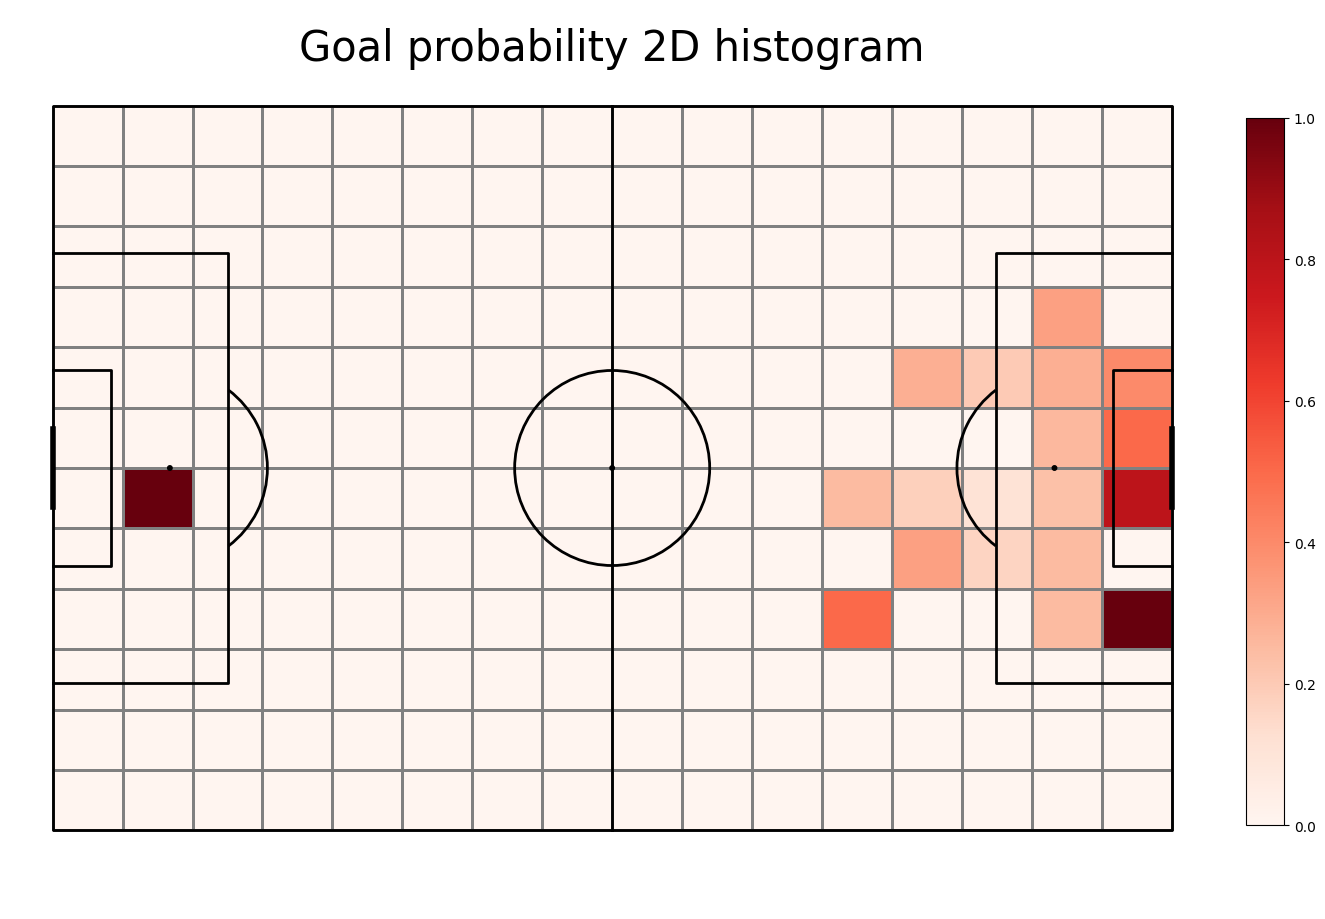

In [12]:
goal_probability = goal_count/shot_count
goal_probability[np.isnan(goal_probability)] = 0
#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
goal["statistic"] = goal_probability
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal probability 2D histogram', fontsize = 30)
plt.show()

***Transition matirices***

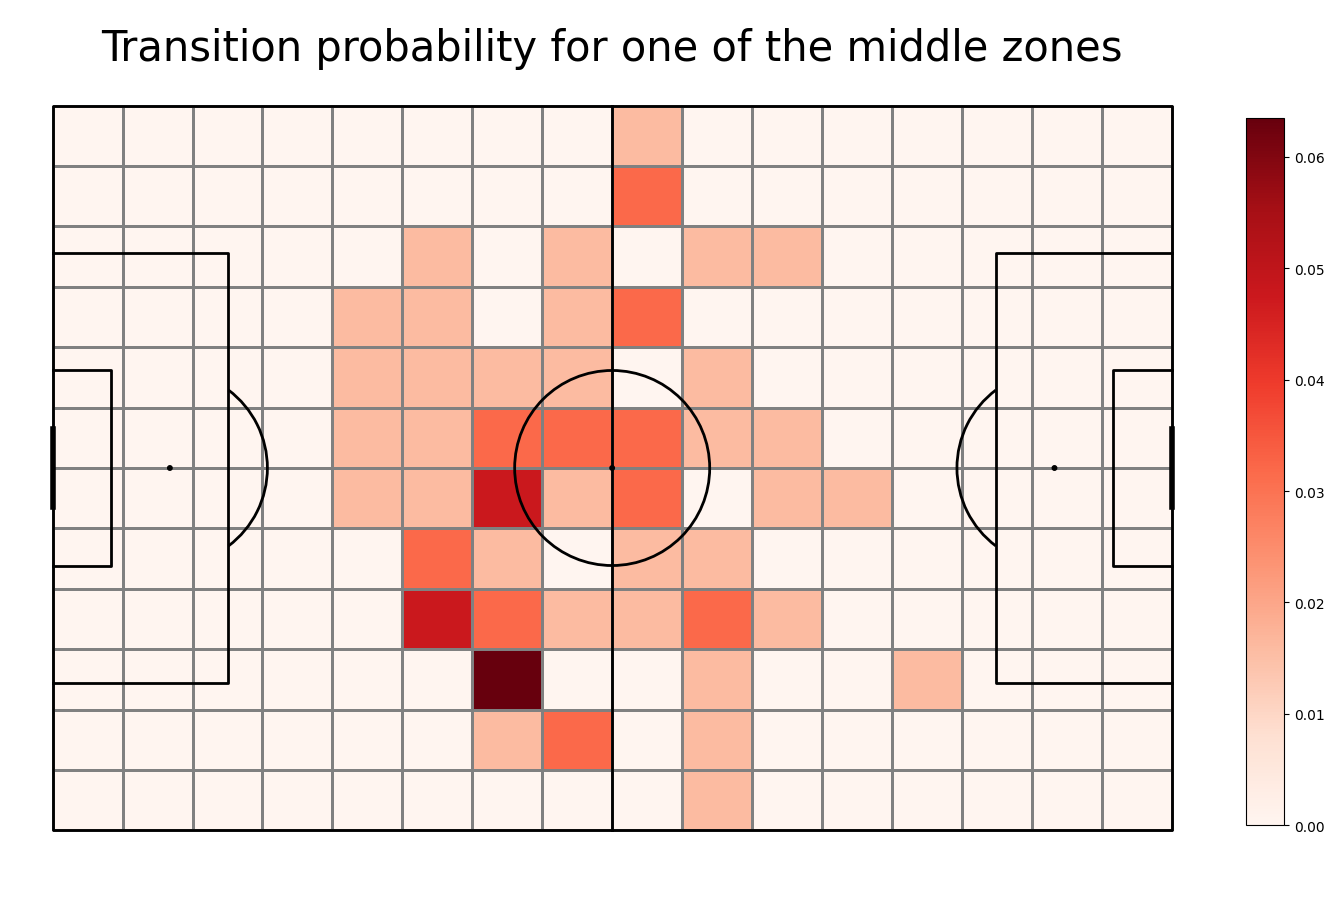

In [13]:
#move start index - using the same function as mplsoccer, it should work
move_df["start_sector"] = move_df.apply(lambda row: tuple([i[0] for i in binned_statistic_2d(np.ravel(row.x), np.ravel(row.y),
                                                               values = "None", statistic="count",
                                                               bins=(16, 12), range=[[0, 105], [0, 68]],
                                                               expand_binnumbers=True)[3]]), axis = 1)
#move end index
move_df["end_sector"] = move_df.apply(lambda row: tuple([i[0] for i in binned_statistic_2d(np.ravel(row.end_x), np.ravel(row.end_y),
                                                               values = "None", statistic="count",
                                                               bins=(16, 12), range=[[0, 105], [0, 68]],
                                                               expand_binnumbers=True)[3]]), axis = 1)

#df with summed events from each index
df_count_starts = move_df.groupby(["start_sector"])["eventId"].count().reset_index()
df_count_starts.rename(columns = {'eventId':'count_starts'}, inplace=True)
transition_matrices = []

for start_i in range(0,16):
    for start_j in range(0,12):
        row = df_count_starts.loc[(df_count_starts['start_sector'] == (start_i+1,start_j+1))]
        T_matrix = np.zeros((12, 16))
        if not row.empty:
            start_sector = row.iloc[0]['start_sector']
            # print(start_sector)
            count_starts = row.iloc[0]['count_starts']
            # print(count_starts)
            this_sector = move_df.loc[move_df["start_sector"] == start_sector]
            df_cound_ends = this_sector.groupby(["end_sector"])["eventId"].count().reset_index()
            df_cound_ends.rename(columns = {'eventId':'count_ends'}, inplace=True)
            T_matrix = np.zeros((12, 16))
            for end_i in range(0,16):
                for end_j in range(0,12):
            # for j, row2 in df_cound_ends.iterrows():
                    row2 = df_cound_ends.loc[(df_cound_ends['end_sector'] == (end_i+1,end_j+1))]
                    if not row2.empty:
                        end_sector = row2.iloc[0]["end_sector"]
                        value = row2.iloc[0]["count_ends"]
                        T_matrix[end_sector[1] - 1][end_sector[0] - 1] = value
            T_matrix = T_matrix / count_starts
        transition_matrices.append(T_matrix)

#let's plot it for the zone [1,1] - left down corner
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Change the index here to change the zone.
goal["statistic"] = transition_matrices[90]
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Transition probability for one of the middle zones', fontsize = 30)
plt.show()

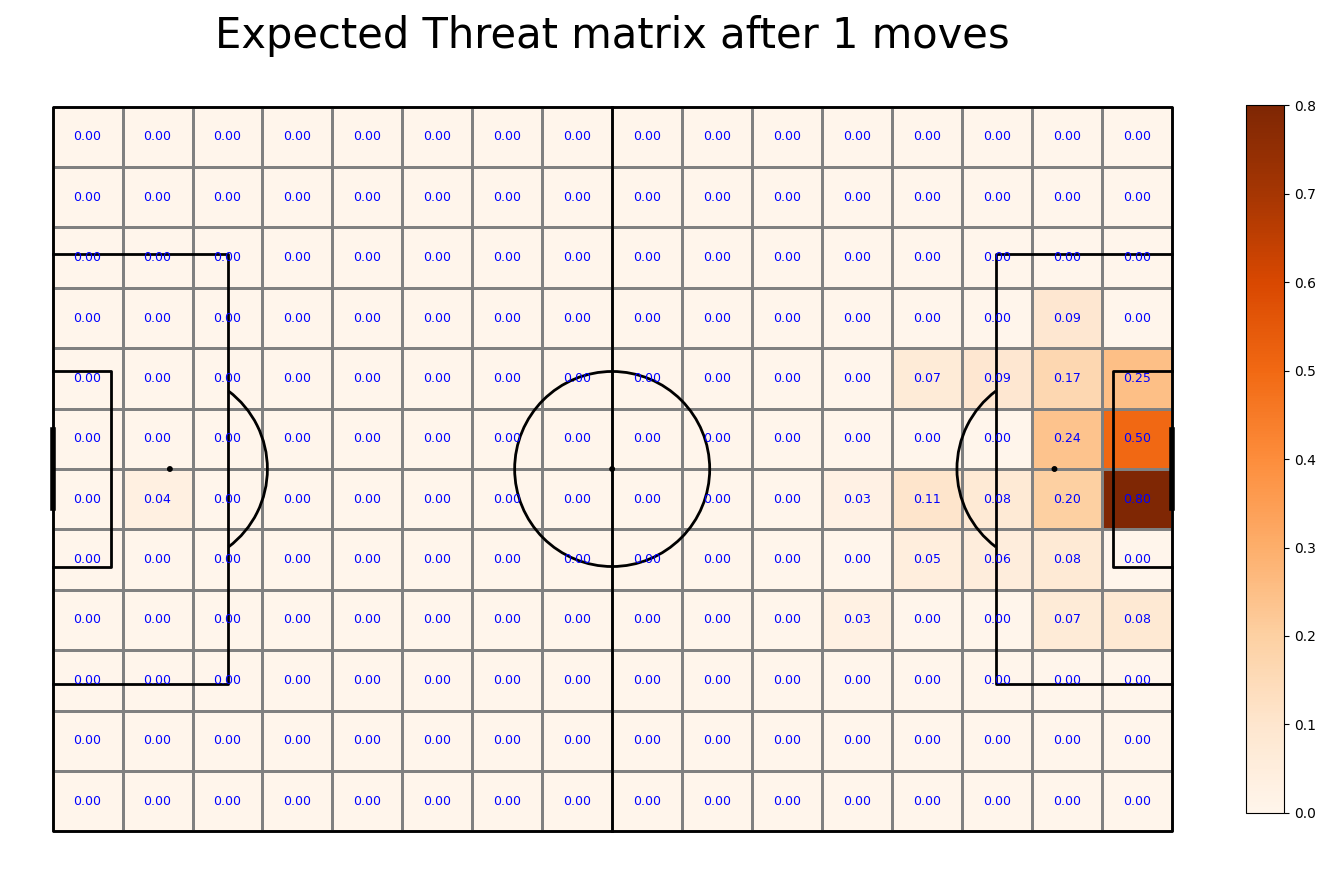

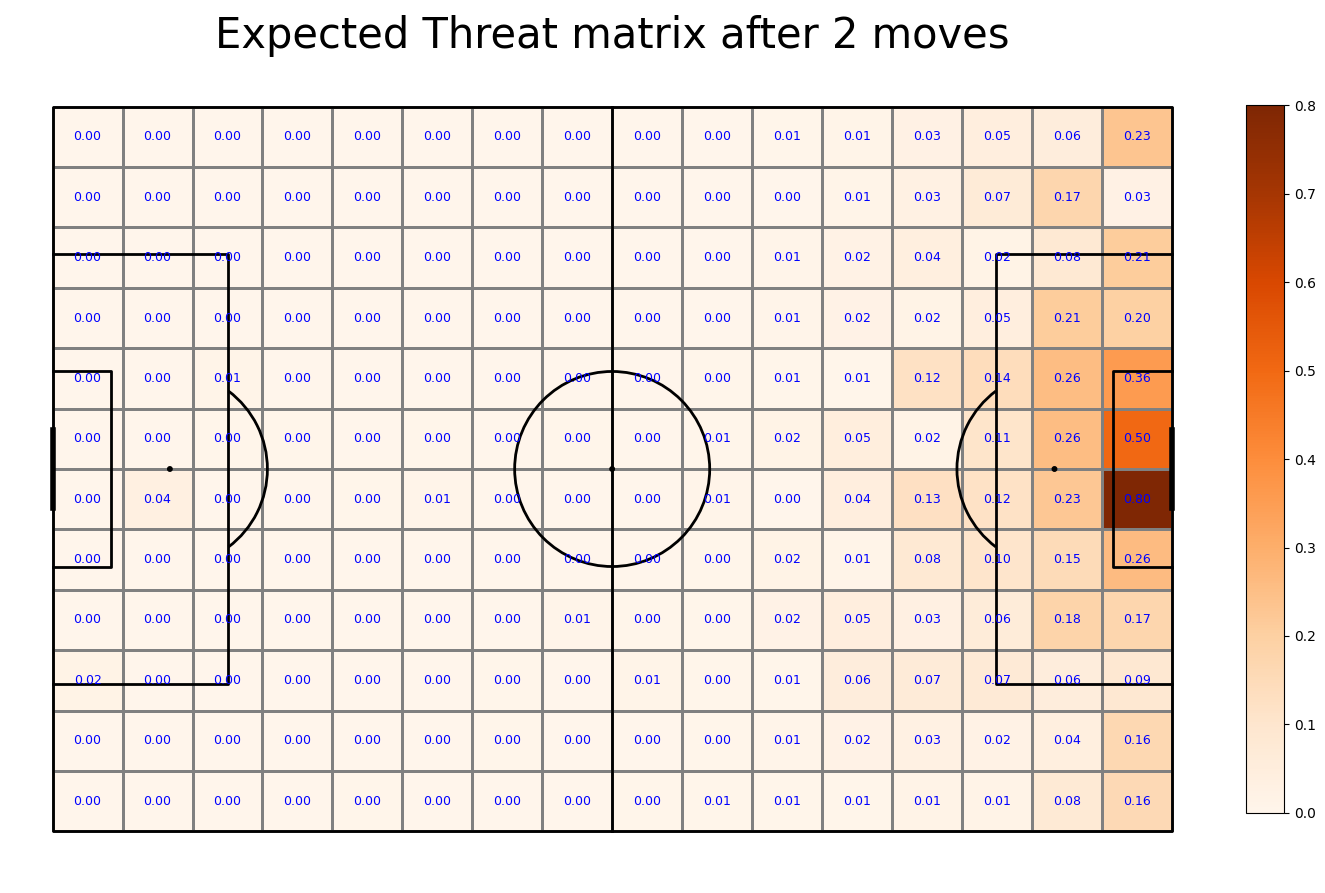

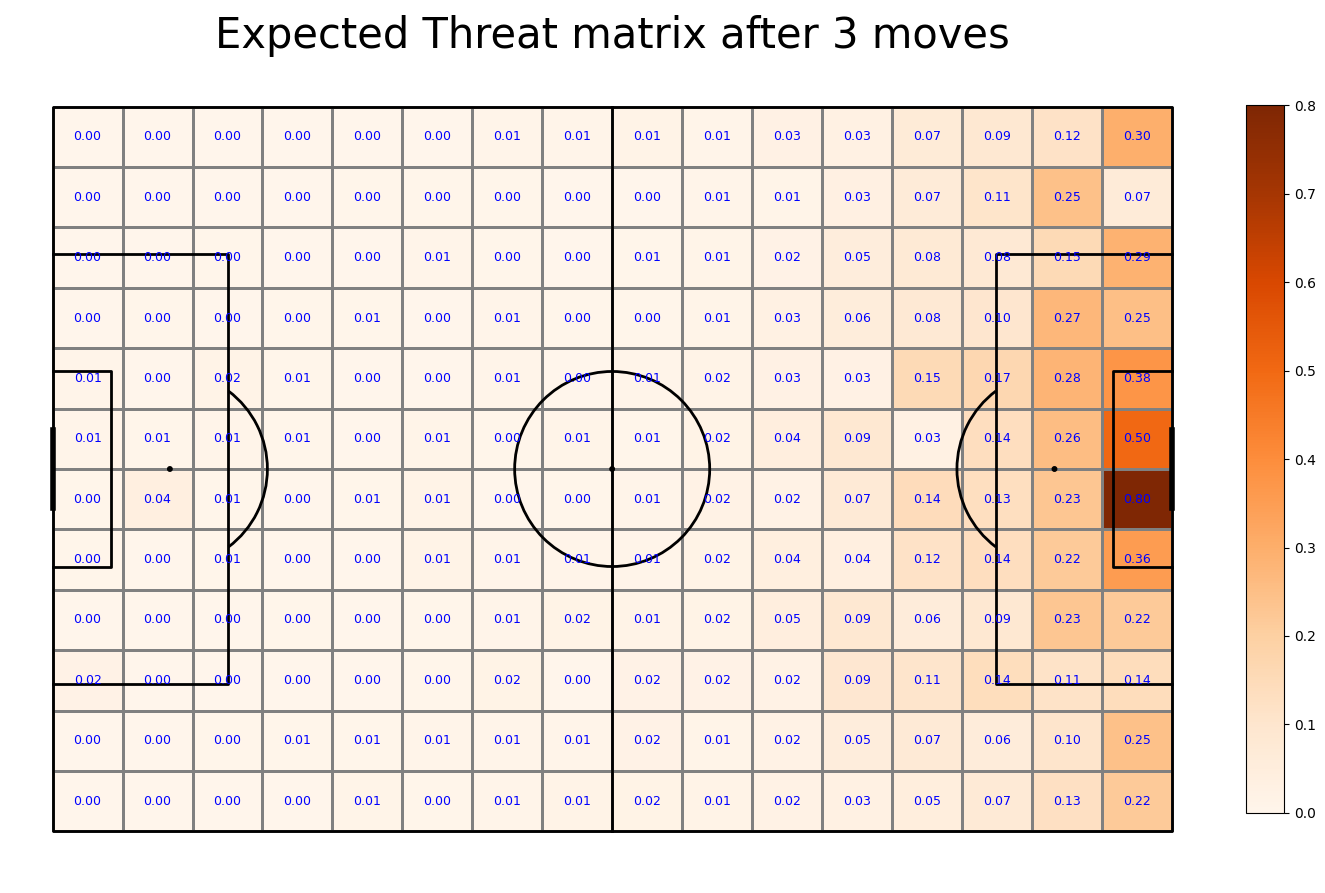

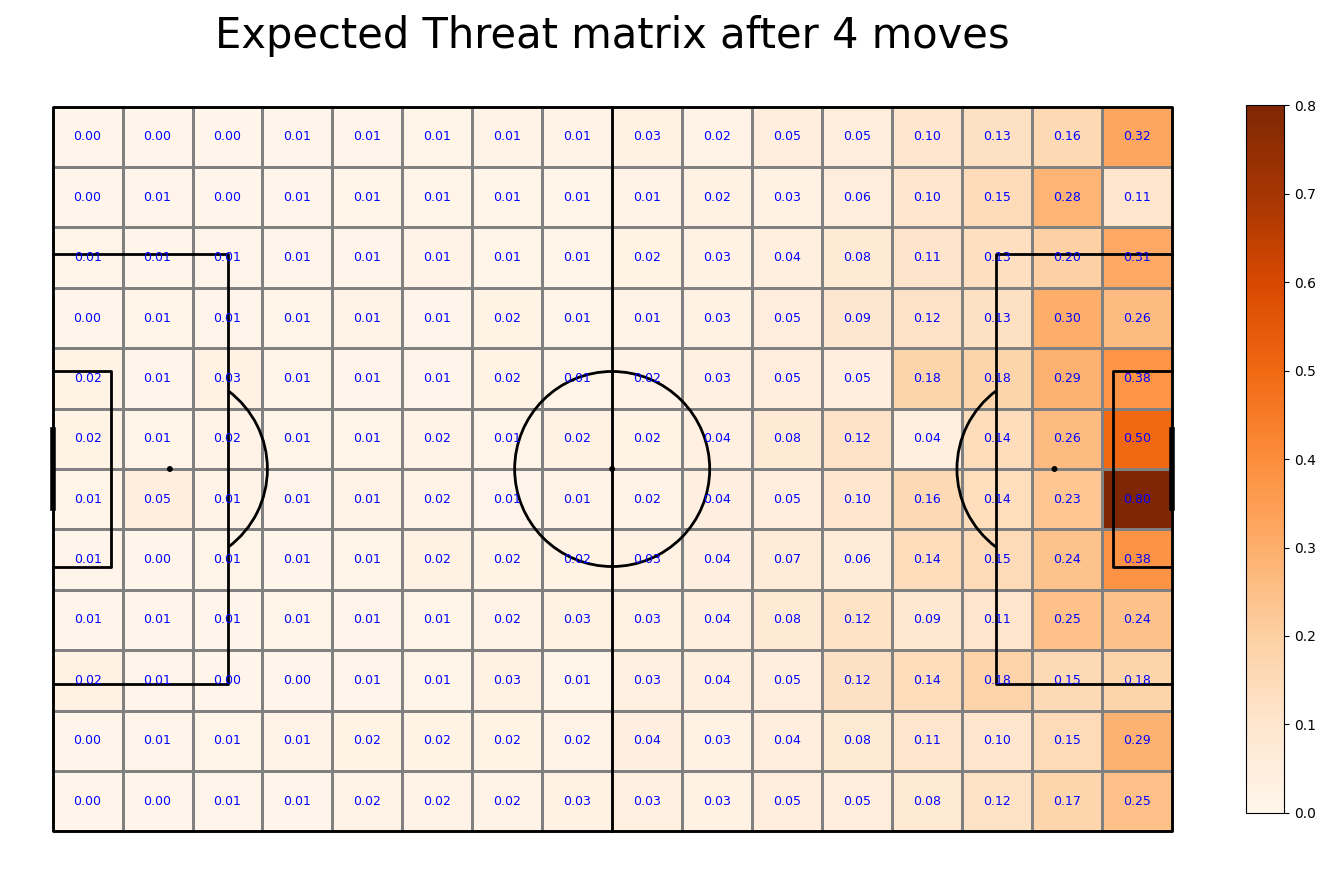

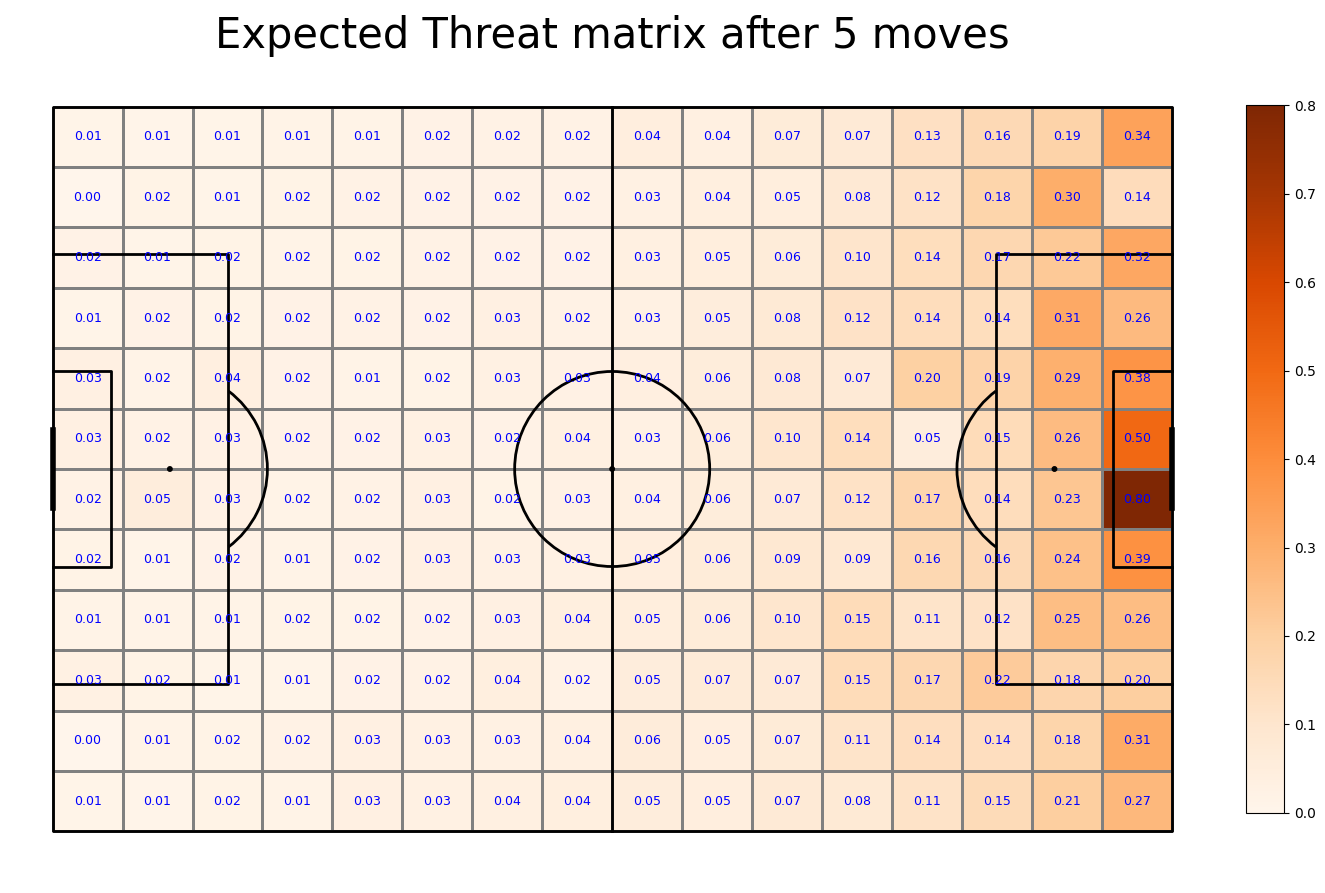

In [14]:
transition_matrices_array = np.array(transition_matrices)
xT = np.zeros((12, 16))
for i in range(5):
    shoot_expected_payoff = goal_probability*shot_probability
    move_expected_payoff = move_probability*(np.sum(np.sum(transition_matrices_array*xT, axis = 2), axis = 1).reshape(16,12).T)
    xT = shoot_expected_payoff + move_expected_payoff
    #let's plot it!
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.01, title_space=0, endnote_space=0)
    goal["statistic"] = xT
    pcm  = pitch.heatmap(goal, cmap='Oranges', edgecolor='grey', ax=ax['pitch'])
    labels = pitch.label_heatmap(goal, color='blue', fontsize=9,
                             ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder = 3)
    #legend to our plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)
    txt = 'Expected Threat matrix after ' +  str(i+1) + ' moves'
    fig.suptitle(txt, fontsize = 30)
    plt.show()

In [15]:
np.savetxt("xT.csv", xT, delimiter=",")